<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment02/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Second Digital Image Processing Assignment
##Analysis of Image Enhancement Methods - Anders Emmanuel Tan (24/541351/PA/22964)
Description: Pada Assignment ini, saya akan menganalisis beberapa metode Image Enhancement untuk beberapa citra, termasuk:


*   Citra yang terlalu Terang/Gelap
*   Citra yang memiliki konstras terlalu rendah
*   Citra yang memiliki terlalu banyak noise
*   Citra yang terlalu kabur

Untuk Setiap Citra tersebut, saya membuat dan membandingkan 2 - 3 Pendekatan Implementasi Image Enhancement untuk melihat pendekatan mana yang menghasilkan hasil yang terbaik untuk kasus-kasus tertentu. Semua Pendekatan yang digunakan didasarkan oleh materi yang diberikan sehingga pendeketan yang mungkin lebih optimal seperti CLAHE tidak dimasukkan.



## 1. Setting Up Image to be Processed
Description: Pada Bagian Pertama Ini, kita akan mempersiapkan Citra-citra yang akan diproses nanti. Karena File yang diupload pada google colab hanya tersedia pada runtime, kita dapat mengunduh file tersebut dengan menyalin file pada Github Submission. Selain itu, kita dapat mengimpor library yang akan dipakai dan mengimpor juga citra-citra yang masing-masing disimpan pada sebuah variabel setelah diubah color mapnya menjadi monochrome agar pengolahan citra lebih mudah. Akhirnya, kita dapat mempersiapkan sebuah function pembantu untuk membantu melihat perbandingan hasil citra dengan citra asli.

In [185]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment02
!git clone https://github.com/Plumz17/PCD_Assignment02

Cloning into 'PCD_Assignment02'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 58 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 1.57 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [187]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image
import math # For Math

filename_dark = "/content/PCD_Assignment02/dark.jpg"
filename_bright = "/content/PCD_Assignment02/bright.jpg"
filename_low = "/content/PCD_Assignment02/low.png"
filename_blur = "/content/PCD_Assignment02/blur.jpg"
filename_noisy = "/content/PCD_Assignment02/noisy.png"


img_dark = cv2.imread(filename_dark) # Read Image
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_BGR2GRAY) # Change the color map
img_low = cv2.imread(filename_low)
img_low = cv2.cvtColor(img_low, cv2.COLOR_BGR2GRAY)
img_blur = cv2.imread(filename_blur)
img_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
img_noisy = cv2.imread(filename_noisy)
img_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)

In [199]:
def show(before, after, title1="Before", title2="After"): # Helper function to check the before and after of the enhancement
  plt.figure(figsize=(10,5))

   # Show original
  plt.subplot(1,2,1)
  plt.imshow(before, cmap='gray')
  plt.title(title1)
  plt.axis("off")

  # Show processed
  plt.subplot(1,2,2)
  plt.imshow(after, cmap='gray')
  plt.title(title2)
  plt.axis("off")

  plt.show()

## 2. Enhancing Dark/Bright Images
Description: Pada bagian kedua pada Assignment ini, saya fokus ke pendekatan Image Enhancement pada citra yang terlalu terang atau terlalu gelap. Kondisi ini sering dijumpai didunia nyata ketika citra yang diambil mengalami underexposure, overexposure, atau diambil pada kondisi pencahayaan yang buruk. Tiga pendekatan utama yang akan dilihat pada bagian ini adalah:

*   Negative Image Transformation
*   Logarithmic Transformation
*   Gamma Transformation

Untuk menyerdehanakan bagian ini, kita akan menggunakan citra yang terlalu gelap. Namun, dapat diingat bahwa kita juga dapat menggunakan pendekatan-pendekatan tersebut untuk mengolah citra yang terlalu terang.

### 2A. Negative Image Transformation


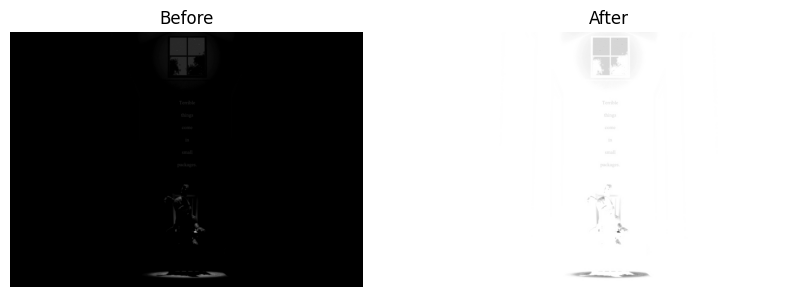

In [200]:
def negative(img):
  out = img.copy()
  L = 256 # max pixel
  for i in range(out.shape[0]): #Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = L - 1 - out[i][j] # Use the formula s = (L - 1) - r, where L is 256 so s = 255 - r
  return out

show(img_dark, negative(img_dark))

Analisis: Pendekatan ini merupakan salah satu bentuk pengolahan berbasis piksel yang paling sederhana dimana value maksimum gambar (biasanya 255) akan dikurangkan dengan value pixel untuk setiap pixel sehingga bagian gelap menjadi terang dan bagian terang menjadi gelap. Walaupun pendekatan ini dapat membuat beberapa bagian menonjol, ia tidak sesungguhnya meng-enhance visibilitas detail citra sehingga kurang efektif dalam menambah kualitas citra. Meski demikian, pendekatan ini dapat lebih berguna dalam kasus seperti Pencitraan Medis dan Analisis Forensik, karena inversi value dapat menunjukan bagian-bagian yang tidak terlihat jelas pada citra aslinya.

### 2B. Logarithmic Transformation

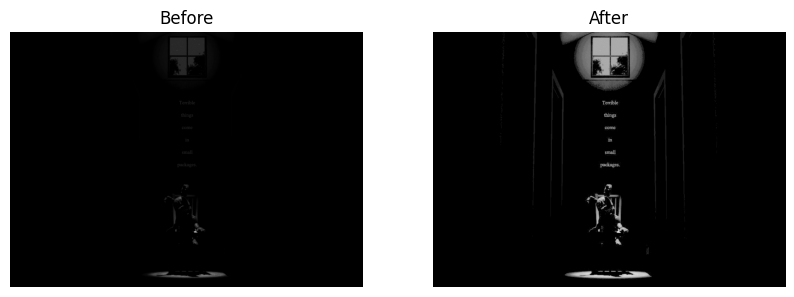

In [202]:
def log(img):
  out = img.copy().astype(float) # So we can handle commas to be log-ed
  R_max = np.max(out)
  L = 256
  c = (L - 1) / np.log(1 + R_max) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * np.log(1 + out[i][j]) #Use the formula s = c * log(1+r)
  return out.astype(np.uint8)

show(img_dark, log(img_dark))

Analisis: Pendekatan ini memberikan pemetaan logaritmik yang meningkatkan value dari pixel yang memiliki intensitas rendah. Hal tersebut dapat dilakukan dengan mencari suatu konstanta c (yang telah dinormalisasi) dan mengalikannya dengan log(1 + r) dimana r adalah nilai pixel aslinya. Akibatnya, bagian-bagian gelap pada suatu citra akan terlihat lebih terang dan jelas. Namun, pendekatan ini akan kurang efektif ketika kita memasukan citra yang terlalu terang/ over-exposed karena ia mungkin dapat menghilangkan kualitas pada bagian terang sebuah citra.

### 2C. Gamma Correction



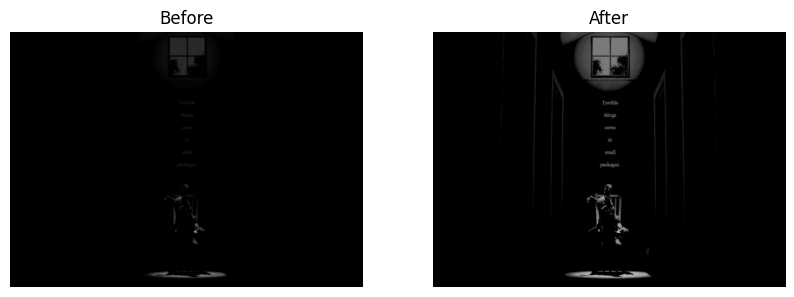

In [211]:
def gamma(img, gamma=0.4):
  out = img.astype(float)
  R_max = np.max(img)
  L = 256
  c = (L - 1) / (R_max ** gamma) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * (img[i][j] ** gamma) # Use the Formula s = c * r ^ gamma
  return out.astype(np.uint8)

show(img_dark, gamma(img_dark))

Analisis: Pendekatan ini sedikit mirip dengan logarithmic transform dengan menggunakan pemetaan linear untuk menentukan nilai dari setiap piksel. Namun, tidak seperti logarithmic transform, metode ini menggunakan rumus s = c * r ^ gamma memberikan tambahan fleksibilitas dengan adanya parameter gamma yang dapat kita modifikasi sesuai kondisi citra. Ketika gamma kurang dari satu, transformasi akan membuat citra terlihat lebih terang. Sebaliknya, ketika gamma lebih dari setu, transformasi akan justru membuat citra terlihat lebih gelap. Fleksibilitas tersebut membuat metode ini baik digunakan untuk mengolah citra yang overexposed dan underexposed. Namun, parameter gamma tersebut juga merupakan sebuah kekurangan karena kita harus memilih parameter yang sesuai karena parameter yang tidak cocok akan memberikan hasil yang tidak optimal.

## 3. Enhancing Low Contrast Images
Description: Pada bagian ketiga pada Assignment ini, saya fokus ke pendekatan Image Enhancement pada citra yang memiliki kontras terlalu rendah. Citra dengan kontras rendah biasanya terjadi karena kondisi pencahayaan yang merata, seperti kabut, bayangan samar, atau kualitas sensor kamera yang terbatas. Dalam kondisi-kondisi tersebut, perbedaan antara bagian terang dan gelap pada citra akan menjadi kurang jelas sehingga detail akan sulit terlihat. Tiga pendekatan utama yang akan dilihat pada bagian ini adalah:

*   Histogram Equalization
*   Contrast Stretching
*   Grey-Level Slicing

###3A. Contrast Stretching


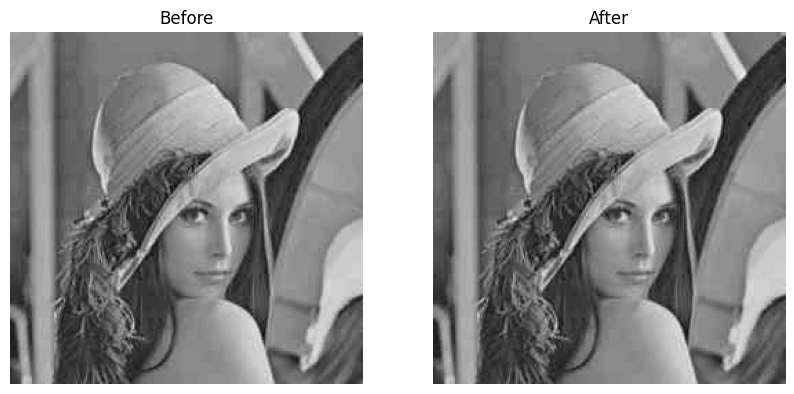

In [203]:
def stretch(img):
  out = img.astype(float)
  # Grab some variables for the formula
  max, min = np.max(out), np.min(out)
  a, b = 0, 255
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = (b - a) * (out[i][j] - min) / (max - min) + a # Apply constrast stretching formula
  return out.astype(np.uint8)

show(img_low, stretch(img_low))

Analisis: Pendekatan ini bekerja dengan memetakan rentang nilai intensitas yang sempit pada citra ke rentang penuh (0–255) melalui transformasi linear. Hal ini membuat citra yang awalnya terlihat pucat atau abu-abu menjadi lebih jelas dengan peningkatan perbedaan antara bagian terang dan gelap. Metode ini akan kurang efektif jika distribusi intensitas tidak merata, misalnya ketika citra hanya memiliki variasi pada area gelap atau terang saja, karena peningkatan kontras pada keseluruhan citra mungkin tidak optimal.

### 3B. Histogram Equalization

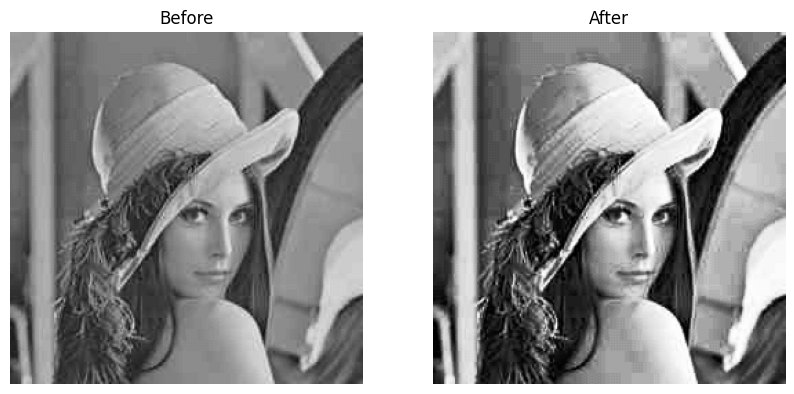

In [204]:
def hist(img):
  L = 256
  #Make Histograms
  hist = np.zeros(L)
  for i in range(img.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(img.shape[1]): #Iterate for every pixel in the y axis
      hist[int(img[i,j])] += 1 # Add that pixel to the histogram

  pdf = hist / (img.shape[0] * img.shape[1]) # Calculate the probablity distribution function (From Probability and Stotastic Process Subject)
  cdf = np.zeros(L)
  cdf[0] = pdf[0]
  for i in range(1, L): # Calculate the cumulative distribution function
    cdf[i] = cdf[i - 1] + pdf[i]

  cdf = (cdf * (L - 1)).astype(np.uint8) # Calculate the pixel value using cdf so it's between 0 and 255

  out = np.zeros(img.shape, dtype=np.uint8)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i,j] = cdf[img[i,j]]
  return out

show(img_low, hist(img_low))

Analisis: Pada pendekatan ini, saya akan melakukan redistribusi nilai intensitas piksel berdasarkan histogram citra agar distribusi citra akan lebih merata pada rentang 0-255. Dengan cara ini, nilai piksel yang awalnya terkonsentrasi disuatu range akan tersebar lebih luas sehingga detail-detail pada citra akan terlihat lebih jelas. Namun, pendekatan ini tidak akan optimal ketika suatu bagian dari citra sudah cukup kontras karena redistribusi nilai dalam menyebabkan area tersebut mengalami over-enhancement.

### 3C. Grey-Level Slicing

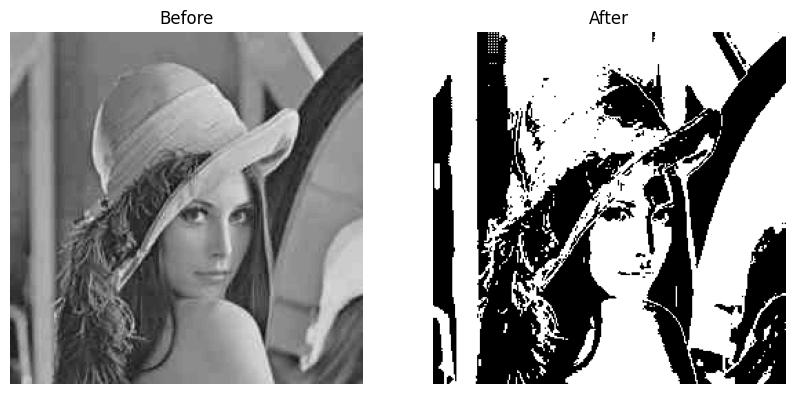

In [205]:
def grey(img, low, high):
  out = img.copy().astype(float)
  for i in range(out.shape[0]): #Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      if (low <= img[i, j] <= high):
        out[i, j] = 255
      else:
        out[i, j] = 0
  return out.astype(np.uint8)

show(img_low, grey(img_low, 130, 170))


Analisis: Pendekatan ini merupakan bentuk khusus dari transformasi linier piecewise dimana hanya rentang intensitas tertentu yang ditonjolkan, sementara nilai di luar rentang tersebut tidak diubah. Pada implementasi ini, rentang nilai piksel antara 130 hingga 170 dipetakan menjadi putih (255), sedangkan nilai lainnya dipetakan menjadi hitam (0). Dengan demikian, bagian citra yang berada dalam range tersebut menjadi sangat jelas terlihat, sementara bagian lain dihilangkan. Teknik ini sangat efektif untuk menitikberatkan detail tertentu dalam citra. Namun, kelemahannya adalah bahwa rentang tersebut harus ditentukan secara manual dan informasi di luar rentang yang dipilih akan hilang, sehingga hasilnya tidak terlalu cocok untuk peningkatan citra umum sehingga metode ini lebih untuk keperluan deteksi/segmentasi atau penekanan fitur tertentu.

## 4. Enhancing Noisy Images
Description: Pada bagian keempat Assignment ini, saya akan fokus pada citra yang memiliki terlalu banyak noise. Noise biasanya muncul karena kualitas sensor kamera yang rendah, kondisi cahaya yang buruk, atau proses transmisi citra yang mengalami gangguan. Keberadaan noise membuat detail citra menjadi kurang jelas sehingga perlu dilakukan proses filtering untuk menguranginya. Pada bagian ini, kita akan menyoroti dua pendekatan enhancing yaitu:
*   Average Smoothing Filter
*   Gaussian Filter

### 4A. Average Smoothing Filter

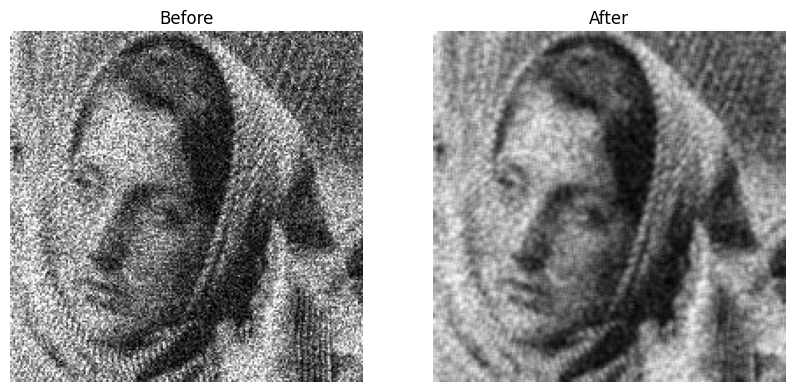

In [206]:
def smooth(img):
  kernel = np.array([[0.11, 0.11, 0.11],
                     [0.11, 0.11, 0.11],
                     [0.11, 0.11, 0.11]])
  blurred = cv2.filter2D(img, -1, kernel) # Blur Image

  return np.clip(blurred, 0, 255).astype(np.uint8)
show(img_noisy, smooth(img_noisy))


Analisis: Pendekatan ini menggunakan kernel rata-rata sederhana (sebuah matriks yang berisi 1/9) untuk menghitung nilai setiap piksel baru berdasarkan rata-rata nilai piksel di sekitarnya. Dengan demikian, variasi tajam akibat noise dapat dihaluskan karena nilai ekstrim akan tereduksi oleh rata-rata tetangganya. Namun, metode ini biasanya menghasilkan citra yang lebih blur karena detail-detail pada citra juga ikut dihaluskan.

### 4B. Gaussian Filter

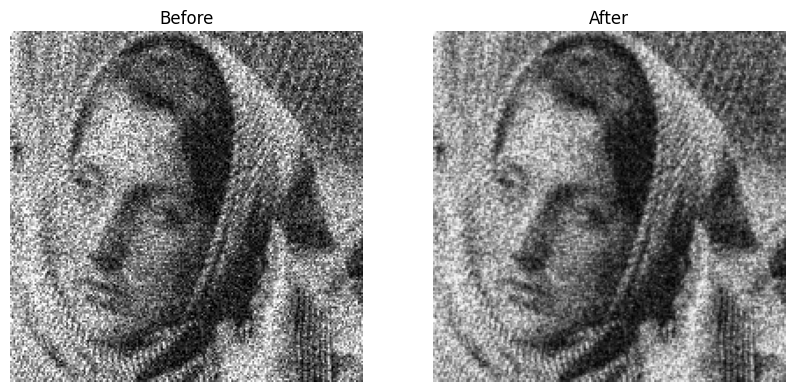

In [213]:
def gaussian_kernel(size=3, sigma=0.5): # Calculate Gaussian_kernel
  k = size // 2 # Get Kernel Radius
  kernel = np.zeros((size,size), dtype = np.float32) # Create empty Kernel

  #Calculate Gaussian Value for each position in kernel using the second part of the formula
  for x in range(-k, k+1):
    for y in range(-k, k+1):
      kernel[x+k, y+k] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

  #Devide kernel with the first part of formula
  kernel /= (2 * np.pi * sigma ** 2)

  #Normalize Kernel so the sum is 1
  return kernel / np.sum(kernel)

def gauss(img):
  kernel = gaussian_kernel()
  blurred = cv2.filter2D(img, -1, kernel) # Blur Image

  return np.clip(blurred, 0, 255).astype(np.uint8)
show(img_noisy, gauss(img_noisy))


Analisis: Berbeda dengan average smoothing yang memberi bobot sama untuk semua tetangga, Gaussian Filter menggunakan distribusi Gaussian untuk memberi bobot lebih besar pada piksel yang lebih dekat ke pusat kernel. Hal ini membuat Gaussian Filter lebih baik dalam mengurangi noise sambil mempertahankan detail penting dibandingkan average filter. Namun, kekurangan pendekatan ini adalah bahwa keberhasilan sangat ditentukan oleh parameter sigma. Jika sigma terlalu besar, hasilnya dapat menjadi terlalu blur, sedangkan sigma yang terlalu kecil membuat noise tidak cukup tereduksi sehingga parameter sigma tersebut harus diseimbangkan dengan tepat agar hasil pengolahan citra unggul.

## 5. Enhancing Blurred Images
Description: Pada bagian keempat Assignment ini, saya akan fokus pada citra yang terlalu kabur. Citra blur dapat disebabkan oleh pergerakan kamera ataupun fokus lensa yang salah. Akibatnya, detail-detail penting menjadi hilang dan tepi objek tampak kabur. kualitas citra kabur, kita dapat menggunakan teknik sharpening yang memperkuat tepi (edges) pada gambar. Pada bagian ini, saya menyoroti dua pendekatan yaitu:


*   Unsharp Filter
*   Laplacian Filter



### 5A. Unsharp Filter

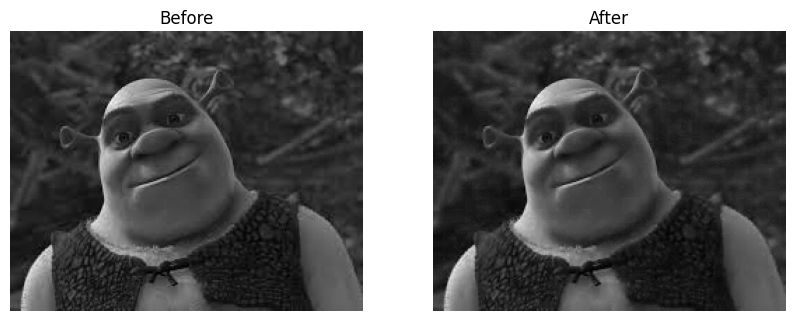

In [215]:
def avg(img):
  kernel = np.array([[0.11, 0.11, 0.11],
                     [0.11, 0.11, 0.11],
                     [0.11, 0.11, 0.11]])
  blurred = cv2.filter2D(img, -1, kernel) # Blur Image
  sharpened = img+0.03*(img-blurred) # Sharpen Image by using the blurred image

  return np.clip(sharpened, 0, 255).astype(np.uint8)
show(img_blur, avg(img_blur))


Analisis: Pendekatan ini bekerja dengan cara membuat versi citra yang sudah di-blur dengan pendekatan 4A, kemudian menggabungkan citra asli dengan selisih antara citra asli dan citra blur. Hasilnya adalah penekanan pada bagian tepi karena perbedaan nilai intensitas di bagian citra yang bertransisi akan semakin dikuatkan. Kekurangan pendekatan ini adalah jika penguatan terlalu besar, citra dapat memunculkan artefak pada sekitar tepi objek.

### 5B. Laplasian Filter

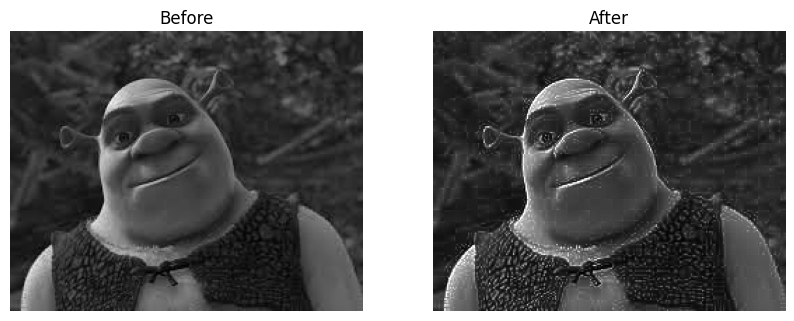

In [209]:
def lap(img):
  lap_kernel = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]], dtype=np.float32)
  lap = cv2.filter2D(img, -1, lap_kernel) # Blur Image
  sharpened = img.astype(np.float32) + lap # Sharpen Image by using the blurred image

  return np.clip(sharpened, 0, 255).astype(np.uint8)
show(img_blur, lap(img_blur))


Analisis: Filter ini memanfaatkan kernel Laplacian yang terfokus pada perubahan intensitas secara tajam pada citra, sehingga bagian tepi menjadi sangat jelas. Pendekatan ini sangat efektif untuk deteksi tepi dan memberikan kesan citra lebih tajam. Namun, sepertinya pendekatan ini sensitif terhadap noise, sehingga penggunaan filter pada citra dengan noise tinggi dapat memperburuk kualitas citra.